In [1]:
#Importing packages for data importing, processing and analysis
import numpy as np
import random
import urllib.request
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
#For completeness the code used to randomly pick the English texts.
#Both the 44 German IDs and 44 English IDs had two innaccesible texts for a total of 42 accessible texts each.

#R = np.random.RandomState(323423)
#english_ids = [9996, 38943, 8438, 2412, 64488, 65708, 58186, 59163, 3290, 5500, 45988, 17522, 48149, 49244, 47136, 34283, 57126, 58224, 14657, 26163, 39746, 4723, 4722, 4724, 4278, 66566, 23082, 42083, 14328, 15268, 47588, 77134, 43116, 19833, 19817, 67097, 42843, 42844, 3150, 19610, 72074, 48495, 27571, 24328, 53799, 24055, 33815, 36208, 52814, 54618, 9306, 54938, 50086, 5621, 62663, 61651, 12956, 74250, 70091, 19796, 25830, 59, 4391, 42208, 33727, 40957, 40089, 51525, 39964, 57342,]
#english_ids = R.choice(english_ids, 44, replace=False)

In [3]:
#Book IDs for the selected texts in the Project Gutenberg Library
german_ids = [
    50525, 54679, 56110, 27532, 64533, 48765, 49428, 29530, 51359,
    18255, 59547, 55014, 56546,  6698,  6728, 50574, 56182,  6342,
    6343, 30821, 36076, 38754, 49543, 55925, 35967, 39441, 15028,
    7205,  7207,  7206,  7202,  7204, 60360,  7203, 47406, 35192,
    53592, 45163, 51586, 60879, 52015, 53962]
english_ids = [
    24328,  8438, 58224, 45988, 27571, 65708, 67097, 62663,  4391,
    54938, 43116, 57342, 19817,  3290, 47588, 33815, 9996,  9306,
    66566, 53799, 74250,  5500,  3150, 36208, 17522, 39964, 61651,
    25830, 49244, 12956, 40089,  4278, 70091, 72074, 59163,  5621,
    26163, 47136, 38943, 19610, 50086, 19833]

In [4]:
#Downloading the raw txt files as strings for each book
english_texts = []
for book_id in english_ids:
  try:
    book_url = f"https://www.gutenberg.org/cache/epub/{book_id}/pg{book_id}.txt"
    book_text = urllib.request.urlopen(book_url)
    book_text = book_text.read()
    #Parsing as utf-8 format
    book_text = book_text.decode("utf-8")
    #Adding the text to the list of texts
    english_texts.append(book_text)
  except:
    #Printing ID for failed extractions.
    print(book_id)

#Getting total character count for English texts
total_eng = 0
for text in english_texts:
  total_eng += len(text)
total_eng

23492853

In [5]:
#Same as previous block but with German texts
german_texts = []
for book_id in german_ids:
  try:
    book_url = f"https://www.gutenberg.org/cache/epub/{book_id}/pg{book_id}.txt"
    book_text = urllib.request.urlopen(book_url)
    book_text = book_text.read()
    book_text = book_text.decode("utf-8")
    german_texts.append(book_text)
  except:
    print(book_id)

#Getting total character count of german texts
total_ger = 0
for text in german_texts:
  total_ger += len(text)
total_ger

19819279

In [6]:
#Creating counter dictionary for tokens in German corpus
german_dict = {}
#Creating German spaCy tokeniser
nlp_de = spacy.blank("de")

for text in german_texts:
  N = int(len(text)/100000)+1
  for i in range(0,N):
    #Splitting doc into small chunks
    doc = nlp_de(text[i * 100000: min((i+1) * 100000, len(text))])
    for token in doc:
      word = token.text.lower()
      #Incrementing count for token by 1, or adding into dictionary if not present.
      if word in german_dict.keys():
        german_dict[word] += 1
      else:
        german_dict[word] = 1

#Printing total token count
sum(german_dict.values())


3677963

In [7]:
#Same as previous block but with the English corpus.
english_dict = {}
nlp_en = spacy.blank("en")

for text in english_texts:
  N = int(len(text)/100000)+1
  for i in range(0,N):
    doc = nlp_en(text[i * 100000: min((i+1) * 100000, len(text))])
    for token in doc:
      word = token.text.lower()
      if word in english_dict.keys():
        english_dict[word] += 1
      else:
        english_dict[word] = 1

sum(english_dict.values())

4950938

In [8]:
german_words = {}
english_words = {}

#Filtering non-alphabetic tokens from the German counter dictionary
for word in german_dict.keys():
  if word.isalpha():
    german_words[word] = german_dict[word]
  else:
    pass

#Filtering non-alphabetic tokens from the English counter dictionary
for word in english_dict.keys():
  if word.isalpha():
    english_words[word] = english_dict[word]
  else:
    pass


In [62]:
#The number of word forms considered for analysis.
word_num = 100

#Creating ordered lists of words from most to least frequent in German and English resp.
full_ger = sorted(german_words, key=german_words.get, reverse=True)
full_eng = sorted(english_words, key=english_words.get, reverse=True)

#Restricting to the desired number of words for analysis.
ranked_ger = full_ger[:word_num]
ranked_eng = full_eng[:word_num]

In [63]:
#Recording frequency and length for the most frequent tokens in German.
freq_ger = []
length_ger = []
for key in ranked_ger:
    freq_ger.append(german_words[key])
    length_ger.append(len(key))

#Recording frequency and length for the most frequent tokens in English.
freq_eng = []
length_eng = []
for key in ranked_eng:
    freq_eng.append(english_words[key])
    length_eng.append(len(key))

#Adding jitter for graphing/visualisation.
jitter_eng = length_eng + np.random.normal(0, 0.05, size=len(length_eng))
jitter_ger = length_ger + np.random.normal(0, 0.05, size=len(length_ger))

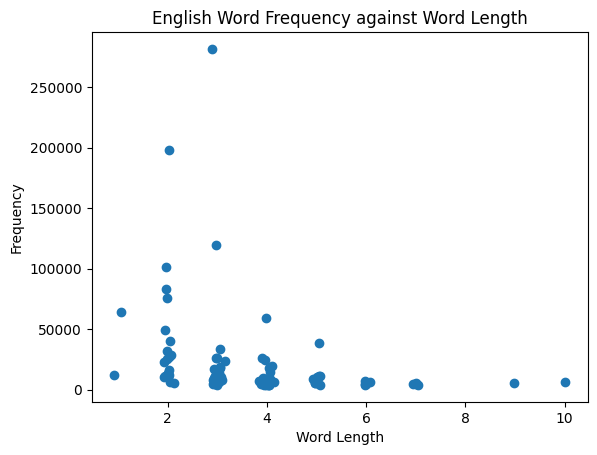

In [64]:
#Plotting word frequency against word length for the selected words
plt.scatter(jitter_eng, freq_eng)
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("English Word Frequency against Word Length")
plt.show()


In [65]:
#Creating dataframes for statistical analysis
df_ger = pd.DataFrame({
    "word": ranked_ger,
    "leng": length_ger,
    "freq": freq_ger,
    "jitt": jitter_ger
})

df_eng = pd.DataFrame({
    "word": ranked_eng,
    "leng": length_eng,
    "freq": freq_eng,
    "jitt": jitter_eng
})




In [67]:
#Choosing which language's dataframe to test on.
df_test = df_eng
# Calculating the Spearman correlation coefficient and p-value
corr, p = spearmanr(df_test["leng"], df_test["freq"])
print("corr:", corr, "p:", p)

corr: -0.5959699873697155 p: 6.094132857277005e-11


In [28]:
#Calculating log frequencies
df_eng["log_freq"] = np.log(df_eng["freq"])
df_ger["log_freq"] = np.log(df_ger["freq"])

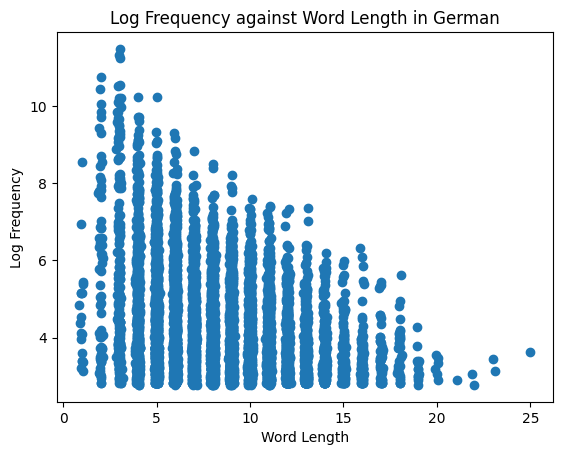

In [48]:
df_plot = df_ger
#Plotting log frequency against word length
plt.scatter(df_plot["jitt"], df_plot["log_freq"])
plt.xlabel("Word Length")
plt.ylabel("Log Frequency")
plt.title("Log Frequency against Word Length in German")
plt.show()